In [252]:
#libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

## Q1 : K-Nearest-Neighbor (KNN) classification on Newsgroups 

[Dataset: newsgroups.zip]

For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

In [93]:
#read files

#Training data matrix
train_data = pd.read_table('newsgroups/trainMatrixModified.txt',header=None)
#Training labels
train_labels = pd.read_table("newsgroups/trainClasses.txt", header=None)[1]

#Testing data matrix
test_data = pd.read_table('newsgroups/testMatrixModified.txt',header=None)
#Testing labels
test_labels = pd.read_table("newsgroups/testClasses.txt", header=None)[1]

#term
terms = pd.read_table("newsgroups/modifiedterms.txt", header=None)

In [14]:
#first five rows of dataframe of training (term *document)
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
#shape of training 
train_data.shape

(5500, 800)

In [95]:
#first five rows of dataframe of trainning label(colume2: 0 for Windows,1 for Hockey)
train_labels.head(5)

0    0
1    1
2    0
3    1
4    0
Name: 1, dtype: int64

In [34]:
#first five rows of dataframe of testing(term *document)
test_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#shape of tesing 
test_data.shape

(5500, 200)

In [97]:
#first five rows of dataframe of testing label (colume2: 0 for Windows,1 for Hockey)
test_labels.head(5)

0    1
1    0
2    0
3    1
4    1
Name: 1, dtype: int64

In [27]:
# first five row of dataframe of terms (term names)
terms.head(5)

,0
0,david
1,rex
2,wood
3,subject
4,call


In [62]:
#shape of terms
terms.shape

(5500, 1)

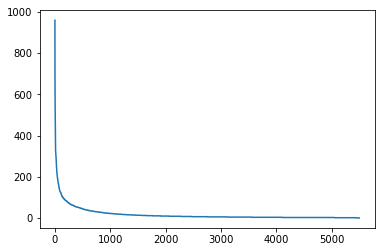

In [66]:
#visulize the distribution of term frequencies of training
Train_termFreqs = train_data.sum(axis=1)
numTerms= train_data.shape[0]
terms = np.genfromtxt("newsgroups/modifiedterms.txt", dtype=str)
dictTF = {}
for i in range(numTerms):
               dictTF[terms[i]] = Train_termFreqs[i]
sortedTF = sorted(dictTF.values(), reverse=True)

plt.plot(sortedTF)
plt.show()

## 1a.
Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.

 ## KNN classifier function

In [146]:
def knn_search(instance, Train, label,  K, measure):
    """ find K nearest neighbours of data point instance among Train """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((Train - instance)**2).sum(axis=1))
    elif measure == 1:
        #cosine similarity
        Train_norm = np.array([np.linalg.norm(Train[i]) for i in range(len(Train))])
        instance_norm = np.linalg.norm(instance)
        sims = np.dot(Train,instance)/(Train_norm * instance_norm)
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    
    # return the predicted_class and top_K_neighbors of KNN
    cls_ls =(label[idx[:K]])
    if (cls_ls == 1).sum() == (cls_ls == 0).sum():
        predicted_class='?'
    elif (cls_ls == 1).sum() > (cls_ls == 0).sum():
        predicted_class= 1
    else:
        predicted_class= 0
    
    top_K_neighbors = Train[idx[:K]]
    
    return predicted_class, top_K_neighbors


## Trying out the function

In [ ]:
Data to be used as input for knn functions

In [141]:
#transpose dfs to document*term  and convert df into numpy array to be used as input for Knn fucntions 
DT_Train = np.array(train_data.T)
DT_Test = np.array(test_data.T)
print "DT_Train:",DT_Train.shape,"\n","DT_Test:",DT_Test.shape,"\n","train_labels:",train_labels.shape

DT_Train: (800, 5500) 
DT_Test: (200, 5500) 
train_labels: (800,)


In [145]:
#now, run the function with the input datas as an example
cls, topK = knn_search(DT_Test[155], DT_Train,train_labels ,5, 1)

print "predicted_class: {} \nk-nearest neighbors: \n {}".format(cls, topK)

predicted_class: 0 
k-nearest neighbors: 
 [[ 5.  0.  0. ...,  0.  0.  0.]
 [ 6.  0.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## 1b.

Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.


## accuracy function

In [180]:
def knn_accuracy_tester(test, testlabel, Train, trainlabel,  K, measure):
    T=0
    F=0
    for i in range(len(test)):
        actual=testlabel[i]
        predicted, topK = knn_search(test[i], Train, trainlabel ,K, measure)
        
        if actual == predicted:
            T += 1
        
        else:
            F += 1
        
    acuuracy = float(T)/float(T+F) 
    
    return acuuracy



## 1c.

Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

## Euclidean Distance ( K : 1 to 20 )

In [211]:
Euc=[]
for K in range(20):
    Euc.append(knn_accuracy_tester(DT_Test, test_labels, DT_Train, train_labels ,K+1, 0))


## Cosine similarity measure ( K : 1 to 20 )

In [210]:
Cos=[]
for K in range(20):
    Cos.append(knn_accuracy_tester(DT_Test, test_labels, DT_Train, train_labels ,K+1, 1))

## plot to compare

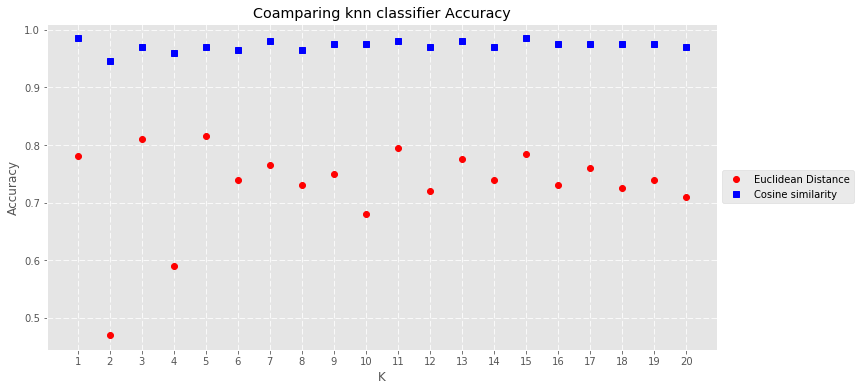

In [257]:
K=list(range(1,21))
plt.figure(figsize=(12,6))
plt.plot(K, Euc, 'ro', label='Euclidean Distance')
plt.plot(K, Cos, 'bs', label='Cosine similarity')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Coamparing knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(K)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Analysis:

Obviously from the plot, we can see that Cosine similaritiy return significantly higher accuracy rate than Eucliden Distance in general

## 1d.

Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

## transform the data ( train_data, test_data ) to TFxIDF weights

Formula: w = tf x log(N / n)

* T = a term in document D
* tf = frequency of that term T in document D
* idf = inverse document frequency of term T in C
* N = total number of docs in the collection C
* n = the number of docs in C that contain term T
* idf = log(N/n)

In [271]:
numTerms=train_data.shape[0]


##Training
# Find doucment frequencies for each term
DF_train = np.array([(train_data!=0).sum(1)]).T # could also say DF = np.array([(DT!=0).sum(0)])
# Create a matrix with all entries = NDocs
NDocs_train = train_data.shape[1]
NMatrix_train=np.ones(np.shape(train_data), dtype=float)*NDocs_train
#calulate IDF
IDF_train = np.log2(np.divide(NMatrix_train, DF_train))
#compute the TFxIDF values for each document-term entry
train_tfidf = train_data * IDF_train
pd.set_option("display.precision", 2)
train_tfidf.head(5)




,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89


In [619]:
##Testing
# Find doucment frequencies for each term
DF_test = np.array([(test_data!=0).sum(1)]).T # could also say DF = np.array([(DT!=0).sum(0)])
# Create a matrix with all entries = NDocs
NDocs_test = test_data.shape[1]
NMatrix_test=np.ones(np.shape(test_data), dtype=float)*NDocs_test
#calulate IDF
IDF_test = np.log2(np.divide(NMatrix_test, DF_test))
#compute the TFxIDF values for each document-term entry
test_tfidf = test_data * IDF_test
pd.set_option("display.precision", 2)
test_tfidf.head(5)


/Users/jasonwu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,3.74,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5.89,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [620]:
#transpose
DT_train_tfidf = np.array(train_tfidf.T)
DT_Test_tfidf = np.array(test_tfidf.T)

 ## Rerun  evaluation and compare the results 

In [621]:
Euc_tfidf=[]
for K in range(20):
    Euc_tfidf.append(knn_accuracy_tester(DT_Test_tfidf, test_labels, DT_train_tfidf, train_labels ,K+1, 0))

Cos_tfidf=[]
for K in range(20):
    Cos_tfidf.append(knn_accuracy_tester(DT_Test_tfidf, test_labels, DT_train_tfidf, train_labels ,K+1, 1))



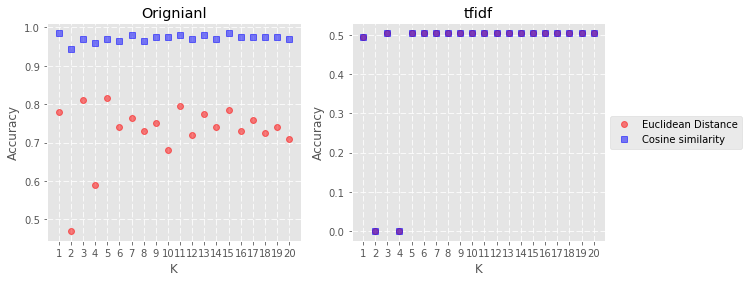

In [544]:
K=list(range(1,21))

fig = plt.figure(figsize=(10, 4))
ax1=fig.add_subplot(121)
ax1.set_title('Orignianl')
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy')
plt.plot(K, Euc, 'ro', label='Euclidean Distance',alpha=0.5)
plt.plot(K, Cos, 'bs', label='Cosine similarity',alpha=0.5)
plt.grid(linestyle='--')
plt.xticks(K)


ax2=fig.add_subplot(122)
ax2.set_title('tfidf')
ax2.set_xlabel('K')
ax2.set_ylabel('Accuracy')
plt.plot(K, Euc_tfidf, 'ro', label='Euclidean Distance',alpha=0.5)
plt.plot(K, Cos_tfidf, 'bs', label='Cosine similarity',alpha=0.5)

plt.grid(linestyle='--')
plt.xticks(K)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()    

## Analysis:

Comaring the results without using TFxIDF weights to results using TFxIDF weights, there are few signs I detected:


__comparing Original VS tfidf:__

    *the accuracy rate drop after using TFxIDF weights
    
    *Euclidean Distance: accuracy rate drop approximately 50%  
    
    *Cosine similarity: accuracy rate drop approximately 30%


__look at the TFxIDF weights alone:__ 

    *the accuracy rate for both Euclidean Distance and Cosine similarity are the same(overlapping on the plot)





## 1e.

Create a classifier based on the Rocchio Method adapted for text categorization. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [ ]:
Rocchio_Accuracy(NewTrainDT, TrainClass[:,1], NewTestDT, TestClass)

## Function of the training part 

In [366]:
def Rocchio_Train(train_TFIDF,label):
    #D: <train_TFIDF,label>
    D= np.column_stack((train_TFIDF, label))
    
    # seperate by class(label) and drop the class
    C0 = D[D[:, -1]==0][:,:-1]
    C1 = D[D[:, -1]==1][:,:-1]
    
    #prototype vector (Pi where i is label== categorical level and pi is sum of Document vactor in ci)
    p0 = C0.sum(axis=0)
    p1 = C1.sum(axis=0)
    
    return p0, p1
   


In [370]:
#Run the function
p0, p1= Rocchio_Train(DT_train_tfidf,train_labels)

## Function of the classification part

In [417]:
def Rocchio_classifier(p0,p1,instance):
    similarity={}
    #cosine similarity
    p0_norm = np.linalg.norm(p0)
    p1_norm = np.linalg.norm(p1)
    instance_norm = np.linalg.norm(instance)
    sims_p0 = np.dot(p0,instance)/(p0_norm * instance_norm)
    sims_p1 = np.dot(p1,instance)/(p1_norm * instance_norm)
    
    #the similarity values of the instance to each of the category prototypes
    similarity[0]= sims_p0
    similarity[1]= sims_p1
    
    #the predicted class
    predit_cls = max(similarity, key = lambda k: similarity[k]) 
    
    return  predit_cls, similarity

In [421]:
#now, run the function with the input datas as an example
predit_cls, similarity = Rocchio_classifier(p0,p1,DT_Test[10])
print predit_cls, similarity

0 {0: 0.37436053819110726, 1: 0.12436849212107273}


## the classification accuracy

In [426]:

def Rocchio_Accuracy_tester(test, testlabel, p0, p1):
    
    T=0
    F=0
    for i in range(len(test)):
        actual=testlabel[i]
        predit_cls= Rocchio_classifier(p0,p1,test[i])[0]
        
        if actual == predit_cls:
            T += 1
        
        else:
            F += 1
        
    acuuracy = float(T)/float(T+F) 
    
    return acuuracy

In [435]:
acuuracy = Rocchio_Accuracy_tester(DT_Test, test_labels, p0, p1)
print "The accuracy rate is %.2f" % acuuracy

The accuracy rate is 0.98


## Analysis:

Comparing the accuracy of the Rocchio method to the Knn method on the original data, we can see that the KNN algorithm with cosine similarity measure outputs better accuracies in general.






## Q2 : Classification using scikit-learn

[Dataset: bank_data.csv]

For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

## 2a.

Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

## Load the data

In [453]:
#Read the data
bk_data = pd.read_csv("bank_data.csv",index_col=0)

In [454]:
#first five rows of bk_data
bk_data.head(5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [455]:
#shape
bk_data.shape

(600, 11)

## Preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn.


__Separate the target attribute__

In [469]:
# Sseparate the target attribute ("pep")
# x : train, y : target
x = bk_data.drop("pep", axis=1, inplace = False)
y = bk_data.pep

In [467]:
x.head(5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [468]:
y.head(5)

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

__Convert the selected dataset into the Standard Spreadsheet format__ 

In [487]:
# get_dummies" function to create dummy variables and converting to standard spreadsheet format
x_mat = pd.get_dummies(x[["age","income","children","gender","region","married","car","savings_acct","current_acct","mortgage"]])
x_mat.head(5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


__Split the transformed data into training and test sets (using 80%-20% randomized split)__

In [488]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.2, random_state=33)

In [489]:
# x 
print x_train.shape,x_test.shape

(480, 19) (120, 19)


In [490]:
# y
print y_train.shape, y_test.shape 

(480,) (120,)


## 2b.

Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

## Normalize the data so that the values are between 0 and 1

In [491]:
from sklearn import preprocessing

In [492]:
min_max_scaler = preprocessing.MinMaxScaler().fit(x_train)
x_train_norm = min_max_scaler.transform(x_train)
x_test_norm = min_max_scaler.transform(x_test)

In [495]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
x_train_norm[0:5]

array([[ 0.57,  0.46,  0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.8 ,  0.78,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.14,  0.16,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.35,  0.18,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.33,  0.18,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

In [496]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
x_test_norm[0:5]

array([[ 0.29,  0.12,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.84,  0.41,  0.33,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.88,  0.62,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.71,  0.75,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.96,  0.56,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

## scikit-learn's KNN classifier

In [562]:
from sklearn import neighbors

In [603]:
#Training
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [604]:
#Testing
knnpreds_test = knnclf.predict(x_test_norm)
print knnpreds_test

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO']


## the confusion matrix, classification report, and the average accuracy score

In [609]:
from sklearn.metrics import confusion_matrix, classification_report

__ Confusion matrix __

In [610]:
knncm = (confusion_matrix(y_test, knnpreds_test))
print knncm

[[48 18]
 [23 31]]


__visulization of matrix__

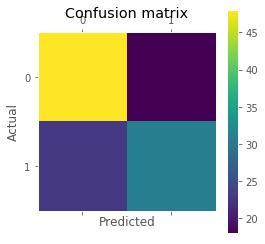

In [611]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)
plt.show()

__Classification report__

In [612]:
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.68      0.73      0.70        66
        YES       0.63      0.57      0.60        54

avg / total       0.66      0.66      0.66       120



__The average accuracy score__

In [608]:
print "Testing: ",knnclf.score(x_test_norm, y_test)
print "Training: ",knnclf.score(x_train_norm, y_train)

Testing:  0.683333333333
Training:  0.695833333333


## Experiment with different values of K and the weight parameter for KNN 

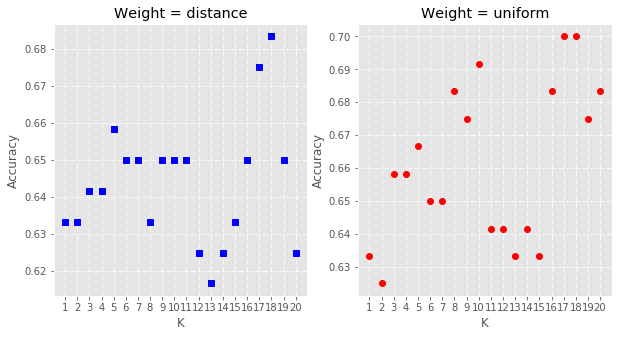

In [607]:
# experiment K = 0~20 and weights = 'distance' then visulize it

fig= plt.figure(figsize=(10,5))
K= list(range(1,21))

for i in range(1,21):
        
        #Knn wiht weights='distance'
        knnclf = neighbors.KNeighborsClassifier(i, weights='distance')
        knnclf.fit(x_train_norm, y_train)

        accuracy = knnclf.score(x_test_norm, y_test)

        ax1=fig.add_subplot(121)
        ax1.set_title('Weight = distance')
        ax1.set_xlabel('K')
        ax1.set_ylabel('Accuracy')
        plt.plot(i,accuracy,'bs')
        plt.grid(linestyle='--')
        plt.xticks(K)
        
        #Knn wiht weights='uniform'
        knnclf = neighbors.KNeighborsClassifier(i, weights='uniform')
        knnclf.fit(x_train_norm, y_train)

        accuracy = knnclf.score(x_test_norm, y_test)

        ax2=fig.add_subplot(122)
        ax2.set_title('Weight = uniform')
        ax2.set_xlabel('K')
        ax2.set_ylabel('Accuracy')
        plt.plot(i,accuracy,'ro')
        plt.grid(linestyle='--')
        plt.xticks(K)


plt.show()

## Analysis:

From plots of accuracy with different k and weight, we can see that in gerenal uniform weight have slightly higher accuracy rate, about 2% higher! Also, the highest accuracy rate fall into k= 18 for both.


## 2c.

Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

## scikit-learn's decision tree classifier 

In [563]:
from sklearn import tree

In [566]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(x_train, y_train)
treepreds_test = treeclf.predict(x_test)
print treepreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO']


DecisionTree classification_report 

             precision    recall  f1-score   support

         NO       0.81      0.86      0.84        66
        YES       0.82      0.76      0.79        54

avg / total       0.82      0.82      0.82       120





DecisionTree confusion_matrix 

[[57  9]
 [13 41]] 






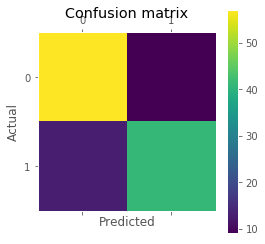






testing accuracy:  0.816666666667
Training accuracy:  0.9875


In [597]:
#report
print "DecisionTree classification_report", "\n\n",classification_report(y_test, treepreds_test),"\n\n\n\n"

#matrix
treecm = confusion_matrix(y_test, treepreds_test)
print 'DecisionTree confusion_matrix',"\n\n" , treecm,"\n\n\n\n" 

#plot of matrix
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)
plt.show()

#Accuracy
print "\n\n\n\n" 
print 'testing accuracy: ', treeclf.score(x_test, y_test)
print 'Training accuracy: ', treeclf.score(x_train, y_train)

## scikit-learn's naive Bayes (Gaussian) classifier

In [598]:
from sklearn import naive_bayes

In [599]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(x_train, y_train)
nbpreds_test = nbclf.predict(x_test)
print nbpreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO']


Bayes classification_report 

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120





Bayes confusion_matrix 

[[49 17]
 [32 22]] 






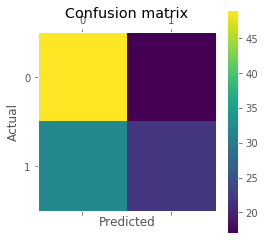






testing accuracy:  0.591666666667
Training accuracy:  0.65625


In [600]:
#report
print "Bayes classification_report", "\n\n",classification_report(y_test, nbpreds_test),"\n\n\n\n"

#matrix
nbcm = confusion_matrix(y_test, nbpreds_test)
print 'Bayes confusion_matrix',"\n\n" , nbcm,"\n\n\n\n" 

#plot of matrix
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)
plt.show()

#Accuracy
print "\n\n\n\n" 
print 'testing accuracy: ', nbclf.score(x_test, y_test)
print 'Training accuracy: ', nbclf.score(x_train, y_train)

## 2d.

Discuss your observations based on the above experiments.

## Analysis:

First, we need to understand the variance - bias tradeoff:

overfitting occures when model is too complicated and may indicate high variance and low bias, wheras underfitting occures when model is too simple and may indicate low variance and high bias. We dont want either. Therefore, our goal is to find the middle point which represnt the best model that minimize the error and is able to help us to predict the class. Common sence is that we want high accuracy rate and the  accuracy between training and testing should be within 10% to avoid overfitting.

Then, from my oberservation on the aboved experiment: 

on naive Bayes (Gaussian) classifier, low accuracy rate for both training and testing indicate the model is too simple and we need to complicate the model to eliminate underfitting occurance,

on decision tree,we have high accuracy for both training and testing(0.98 and 0.81 ) but the diffrence of accuracy rate between training and testing is over 10% which indicate that the model is overfitting! trying differnet paremeter for min_samples_split help to reduce the overfitting

on KNN, the highest accuracy rate it achieve is approximately 70% when  we set  k= 18 and weights='uniform'. As mentioned before , trying out with different parameter and compare the accuracy betwwen training and testign can help us avoid overfittign and underfittig situation and fidn the best tradeoff point. 


## Q3 : Data Analysis and Predictive Modeling on Census data

[Dataset: adult-modified.csv]

For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.

Your tasks in this problem are the following:

In [659]:
#read data\
# na_values='?' for missing value
adt=pd.read_csv("adult-modified.csv",na_values='?')
adt.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [660]:
adt.shape

(10000, 8)

## 3a. Preprocessing and data analysis:

### 3a_i.
Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

### Examine and fill in the missing values: 

### find the column with missing value

In [656]:
print "attribute with missing values: \n"
print [col for col in adt.columns if adt[col].isnull().any()]

attribute with missing values: 

['age', 'workclass']


### Numerical attribute "age"

fill-in the missing values using the attribute mean

In [663]:
age_mean = adt.age.mean()
adt.age.fillna(age_mean, axis=0, inplace=True)

In [664]:
adt.shape

(10000, 8)

### Categorical attribute 'workclass'

Remove instances with missing values

In [665]:
adt.dropna(axis=0, inplace=True)
adt.shape

(9412, 8)

### Look at dataframe info to make sure all the missing vlaue has been taken care 

In [666]:
adt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
age               9412 non-null float64
workclass         9412 non-null object
education         9412 non-null int64
marital-status    9412 non-null object
race              9412 non-null object
sex               9412 non-null object
hours-per-week    9412 non-null int64
income            9412 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


In [668]:
print "attribute with missing values: \n"
print [col for col in adt.columns if adt[col].isnull().any()]

attribute with missing values: 

[]


### 3a_ii.
Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.



### Histograms and boxplot  for Numerical attribues ('age', 'education', 'hours-per-week' ):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x156d9f110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1572b01d0>]], dtype=object)

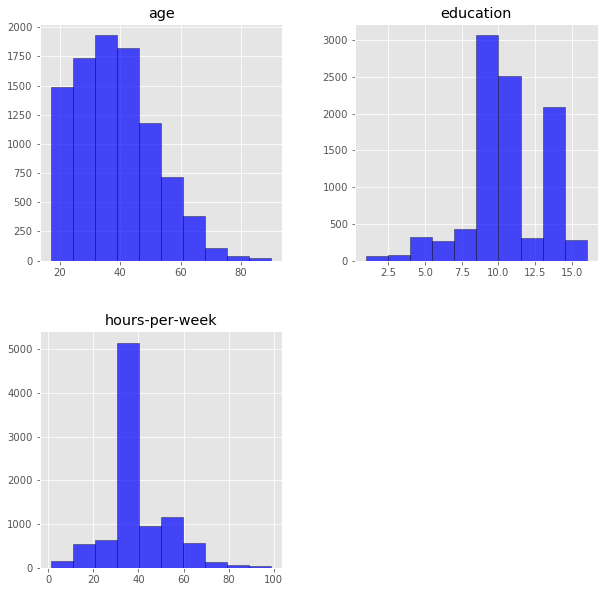

In [674]:
#histogram
plt.figure()
adt[['age', 'education', 'hours-per-week']].hist(color='blue',alpha=0.7,edgecolor="black",figsize=(10, 10) )

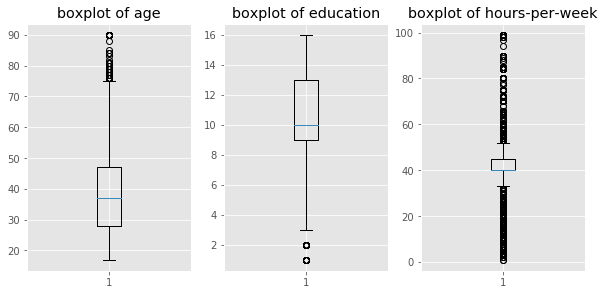

In [675]:
#box plot
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,3,1) 
ax1.boxplot(adt['age'])
ax1.set_title("boxplot of age")
ax2 = fig.add_subplot(2,3,2) 
ax2.boxplot(adt['education'])
ax2.set_title("boxplot of education")
ax2 = fig.add_subplot(2,3,3)
ax2.boxplot(adt['hours-per-week'])
ax2.set_title("boxplot of hours-per-week")

plt.show()

Histogram show the distribution of the data for each attribute and boxplot provide the visulization of the basic five number summary statistic

### Bar graphs for Numerical attribues('workclass','marital-status','race','sex','income'):

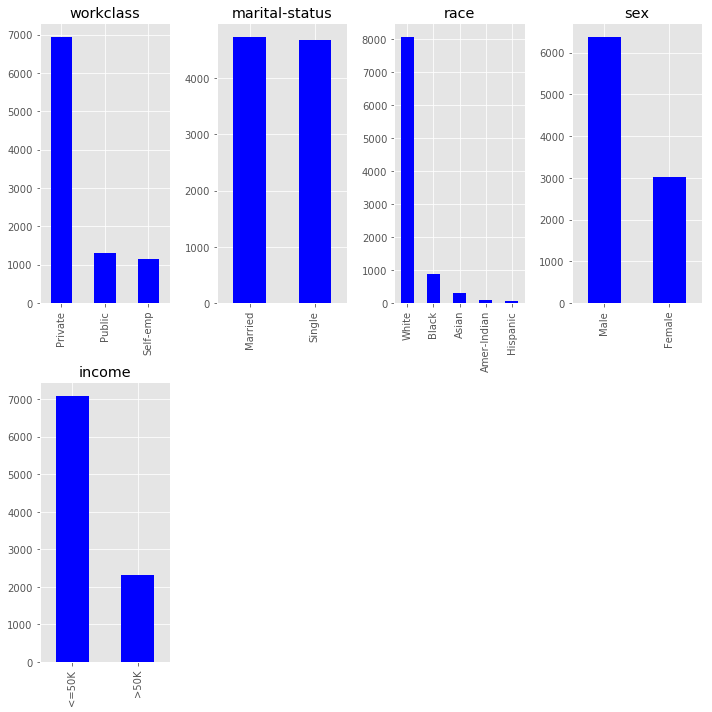

In [694]:
#bar plot
a=['workclass','marital-status','race','sex','income']
fig = plt.figure(figsize=(10, 10))
for i in range(len(a)):
    
    ax=fig.add_subplot(2,4,i+1)
    ax.set_title(a[i])
    adt[a[i]].value_counts().plot(kind='bar',color='blue')
fig.tight_layout()
plt.show()
    

### 3a_iii. 
Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

### Cross-tabulations and barchart (education+race, work-class+income, work-class+race, race+income)

In [ ]:
from IPython.display import display
# cross-tabulations
c1 = pd.crosstab( adt["education"],  adt["race"])
c2 = pd.crosstab( adt["workclass"],  adt["income"])
c3 = pd.crosstab( adt["workclass"],  adt["race"])
c4 = pd.crosstab( adt["race"],  adt["income"])

### education+race

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


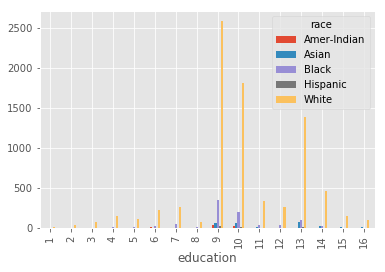

In [727]:
display(c1)
plt.show(c1.plot(kind="bar"))

### work-class+income

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


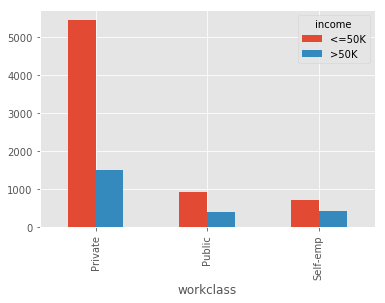

In [728]:
display(c2)
plt.show(c2.plot(kind="bar"))

### work-class+race

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


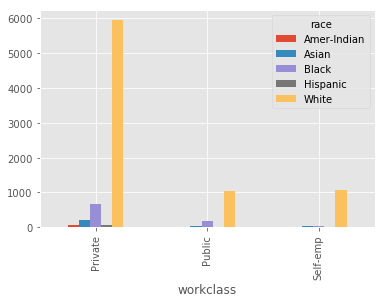

In [729]:
display(c3)
plt.show(c3.plot(kind="bar"))

### race+income

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


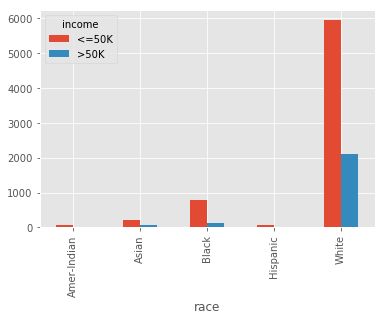

In [730]:
display(c4)
plt.show(c4.plot(kind="bar"))

### bar chart showing percentages of each race category that fall in the low-income group


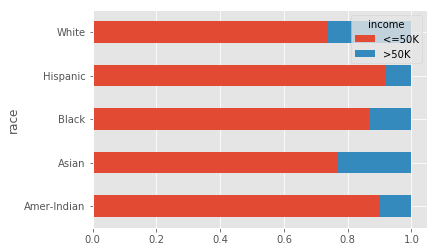

In [740]:
crt_p = pd.crosstab(adt['race'],adt['income']).apply(lambda x: x/x.sum(), 1)
plt.show(crt_p.plot.barh(stacked=True))

### Conclusion:

__In general:__

The race group is inbalanced! The number of white people is very large and therefore white people dominate several plots above.

__In detail(percentage wise):__

from the last plot, it tell us that higher percentage of  Asian and white people have high income than other race and high percententage of hispanice peoeple have low income than other race

### 3a_iiii. 
Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

### box plot of numerical attribute by income 

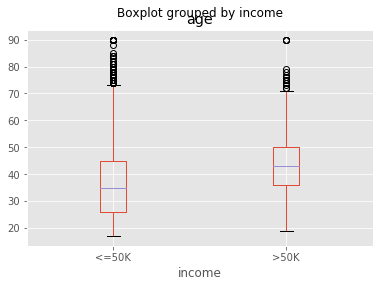

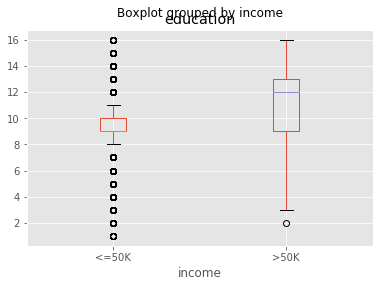

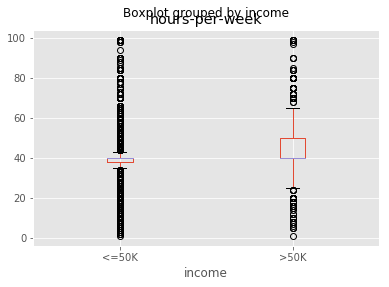

In [742]:
fig = plt.figure(figsize=(10, 10))

a= adt.boxplot(column= 'age',by='income')
b= adt.boxplot(column= 'education',by='income')
c= adt.boxplot(column= 'hours-per-week',by='income')

plt.show()

from plot above, we can see that people with high income generally are older, have higer education.

### bar plot of categorical attribute by income (percentage wise)

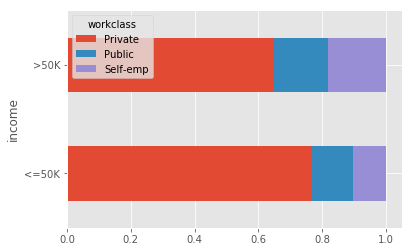

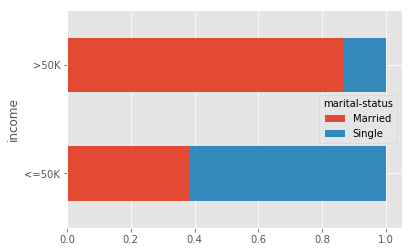

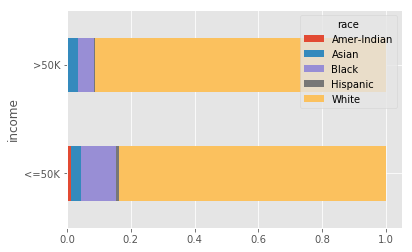

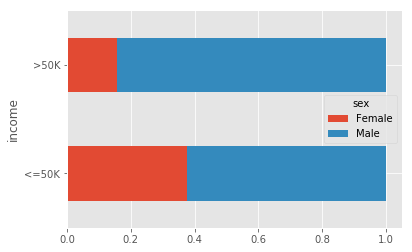

In [746]:
a=['workclass','marital-status','race','sex']
for i in a:
    pd.crosstab(adt["income"],adt[i]).apply(lambda x: x/x.sum(), 1).plot.barh(stacked=True)
#plt.show(crt_p.plot.barh(stacked=True))


from plots above, it tell us people with high income tend to be male,white,married,and prive worker.

## 3b. Predictive Modeling and Model Evaluation:

### 3b_i.  
Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [763]:
#dummmy
adt_ssf=pd.get_dummies(adt)
adt_ssf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 17 columns):
age                       9412 non-null float64
education                 9412 non-null int64
hours-per-week            9412 non-null int64
workclass_Private         9412 non-null uint8
workclass_Public          9412 non-null uint8
workclass_Self-emp        9412 non-null uint8
marital-status_Married    9412 non-null uint8
marital-status_Single     9412 non-null uint8
race_Amer-Indian          9412 non-null uint8
race_Asian                9412 non-null uint8
race_Black                9412 non-null uint8
race_Hispanic             9412 non-null uint8
race_White                9412 non-null uint8
sex_Female                9412 non-null uint8
sex_Male                  9412 non-null uint8
income_<=50K              9412 non-null uint8
income_>50K               9412 non-null uint8
dtypes: float64(1), int64(2), uint8(14)
memory usage: 422.8 KB


In [784]:
# X >> training, y >> target
y=adt_ssf['income_>50K']
x=adt_ssf.drop(["income_<=50K","income_>50K"],axis=1)
print "y(target):",'\n\n',y.name,'\n\n'
print "x(training):",'\n\n',x.info()

y(target): 

income_>50K 


x(training): 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 15 columns):
age                       9412 non-null float64
education                 9412 non-null int64
hours-per-week            9412 non-null int64
workclass_Private         9412 non-null uint8
workclass_Public          9412 non-null uint8
workclass_Self-emp        9412 non-null uint8
marital-status_Married    9412 non-null uint8
marital-status_Single     9412 non-null uint8
race_Amer-Indian          9412 non-null uint8
race_Asian                9412 non-null uint8
race_Black                9412 non-null uint8
race_Hispanic             9412 non-null uint8
race_White                9412 non-null uint8
sex_Female                9412 non-null uint8
sex_Male                  9412 non-null uint8
dtypes: float64(1), int64(2), uint8(12)
memory usage: 404.4 KB
None


### 3b_ii.
Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [785]:
from sklearn import cross_validation

### Naive Bayes (Gaussian)

In [807]:
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(x, y)
print 'pridicted: ', nbclf.predict(x)
print 'Score: ', nbclf.score(x, y)

pridicted:  [0 1 0 ..., 0 1 0]
Score:  0.719507012325


In [809]:
#10-fold cross-validation
cv_scores = cross_validation.cross_val_score(nbclf, x, y, cv=10)
print '10-fold cross-validation scores: ', cv_scores

10-fold cross-validation scores:  [ 0.73  0.7   0.73  0.7   0.73  0.71  0.71  0.72  0.73  0.71]


In [794]:
#overall average accuracy
print("Overall Accuracy of Naive Bayes (Gaussian): %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy of Naive Bayes (Gaussian): 0.72 (+/- 0.02)


### decision tree (using "entropy" as selection criteria)

In [810]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=20, max_depth= 5)
treeclf = treeclf.fit(x, y)
print 'pridicted: ', treeclf.predict(x)
print 'Score: ', treeclf.score(x, y)

pridicted:  [0 0 0 ..., 0 0 0]
Score:  0.819060773481


In [811]:
#10-fold cross-validation
cv_scores = cross_validation.cross_val_score(treeclf, x, y, cv=10)
print '10-fold cross-validation scores: ', cv_scores

10-fold cross-validation scores:  [ 0.81  0.81  0.81  0.83  0.82  0.8   0.81  0.82  0.82  0.82]


In [797]:
#overall average accuracy
print("Overall Accuracy of Decision Tree: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy of Decision Tree: 0.82 (+/- 0.02)


### Linear discriminant analysis (LDA)

In [800]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [812]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(x, y)
print 'pridicted: ', ldclf.predict(x)
print 'Score: ', ldclf.score(x, y)

pridicted:  [0 1 0 ..., 0 0 0]
Score:  0.80875478113


In [814]:
#10-fold cross-validation
cv_scores = cross_validation.cross_val_score(ldclf, x, y, cv=10)
print '10-fold cross-validation scores: ', cv_scores

10-fold cross-validation scores:  [ 0.81  0.81  0.79  0.82  0.81  0.79  0.8   0.81  0.82  0.82]


In [815]:
#overall average accuracy
print("Overall Accuracy of LDA: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy of LDA: 0.81 (+/- 0.02)


### 3b_[Extra Credit] 
For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf).

In [860]:
from sklearn import tree
from StringIO import StringIO
import pydot
import pydotplus

In [861]:
tree.export_graphviz(treeclf,out_file='tree.dot',feature_names=list(x.columns))

In [862]:
dot_data = StringIO()
tree.export_graphviz(treeclf, out_file=dot_data, feature_names=list(x.columns))  
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Census_tree.png")

True

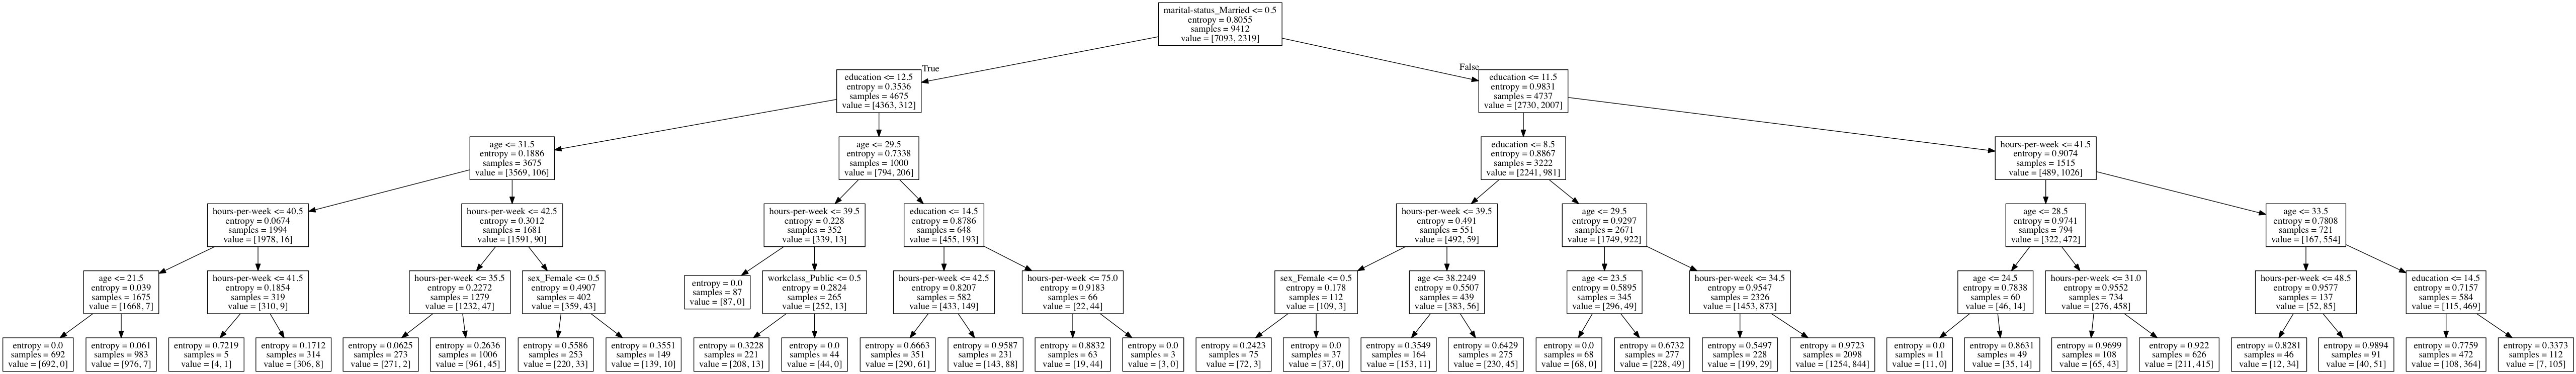

In [863]:
from IPython.display import Image
Image(filename='Census_tree.png')